In [1]:
#% pip install openpyxl
import os, re, configparser
import pandas as pd
import numpy as np
from globals import glob
from utilities_database import prepare_data, prepare_database, consult_database, clear_databases, retrieve_data, rename_index, get_date, get_sigma, rename_limits_table
from utilities_analysis import mean_calculator, limits_generator, ini_generator, RyR, z_score_filter, reset_df, capability_calculation
from utilities_plotting import plot_scatter, plot_capability, plot_simple_limits
import ipywidgets as widgets
from ipywidgets import HBox
import _db_tools as db
##Widgets creation
mean_slider = widgets.FloatSlider(value=0.35, min=0.3, max=0.4, step=0.005, description='X-axis mean')
range_slider = widgets.IntSlider(value=5, min=1, max=10, step=1, description='X-axis zoom')
means_calculation = widgets.ToggleButtons(options=['Global means', 'Per position means'], description='Means algorithm', disabled=False, button_style='', tooltips=['Calculate global means for each limit', 'Calculate means for each position'],)

Database *input.db* found in: c:\Users\lucio\Desktop\Codebase\Python_Eiit_RyR\a2_Analyser\database\input.db
Database *output.db* found in: c:\Users\lucio\Desktop\Codebase\Python_Eiit_RyR\a2_Analyser\database\output.db


In [2]:
##Database access
table_list = consult_database("input.db", verbose=False)
default_measurements = consult_database("input.db", verbose=False, filter=glob.tooling+"_measurements_filtered_")[-1]
default_limits = consult_database("input.db", verbose=False, filter=glob.tooling+"_limits_corrected_")[-1]
tables = widgets.SelectMultiple(options=table_list, value=(default_measurements, default_limits), description='input db', rows=10, layout={'width': '600px'})

In [3]:
##Data extraction
print('Select the tables to load with "CTRL" or "SHIFT" pressed:')
display(tables)
MEAS = retrieve_data("input.db", next((string for string in tables.value if "measurements" in string), None))
LIMITS = retrieve_data("input.db", next((string for string in tables.value if "limits" in string), None))
if MEAS is None or MEAS.empty or LIMITS is None or LIMITS.empty:
    print("WARNING: Some data might not be correctly retrieved")

Select the tables to load with "CTRL" or "SHIFT" pressed:


SelectMultiple(description='input db', index=(5, 3), layout=Layout(width='600px'), options=('TOP_PASSAT_B9_lim…

Table *VA_007_measurements_filtered_2023y_12m_23d_22h_06m_55s* retrieved succesfully.
Table *VA_007_limits_corrected_2023y_12m_23d_22h_04m_11s* retrieved succesfully.


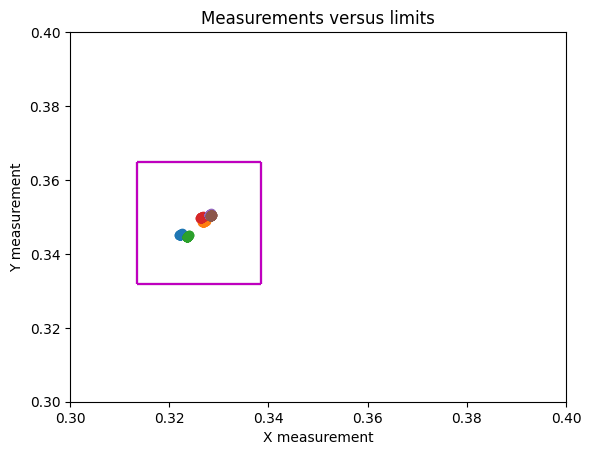

In [5]:
DATA_format = rename_index(pd.concat([MEAS, LIMITS], axis=1))
plot_simple_limits(DATA_format, glob.nests_number, xrange=[0.3, 0.4], yrange=[0.3, 0.4], limit_filter=None)

In [6]:
LIMITS

,LO_LIMIT,HI_LIMIT
0,0.313480,0.338480
1,0.331756,0.364756
2,0.313480,0.338480
3,0.331756,0.364756
4,0.313480,0.338480
5,0.331756,0.364756
6,0.313480,0.338480
7,0.331756,0.364756
8,0.313480,0.338480
9,0.331756,0.364756
